<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/portfolio%20recovery%20period%20after%20crisis.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install okama

In [1]:
import matplotlib. pyplot as plt
import pandas as pd

import okama as ok

**ВНИМАНИЕ:** Метод `recovery_periods` доступен только для версий библиотеки 1.0.0 и выше.

In [2]:
ok.__version__

'1.0.0'

### Long Term Bonds Funds

In [2]:
bonds = ok.AssetList(['PINCX.US', 'NTHEX.US'])  # взаимные фонды с активным управлением
bonds

symbols          [PINCX.US, NTHEX.US]
currency                          USD
first_date                    1980-02
last_date                     2021-05
period_length      41 years, 4 months
inflation                    USD.INFL
dtype: object

In [29]:
bonds.names

{'PINCX.US': 'PUTNAM INCOME FUND CLASS A SHARES',
 'NTHEX.US': 'NORTHEAST INVESTORS TRUST NORTHEAST INVESTORS TRUST'}

In [27]:
bonds.recovery_periods

PINCX.US    18.0
NTHEX.US     NaN
dtype: float64

<AxesSubplot:xlabel='Date'>

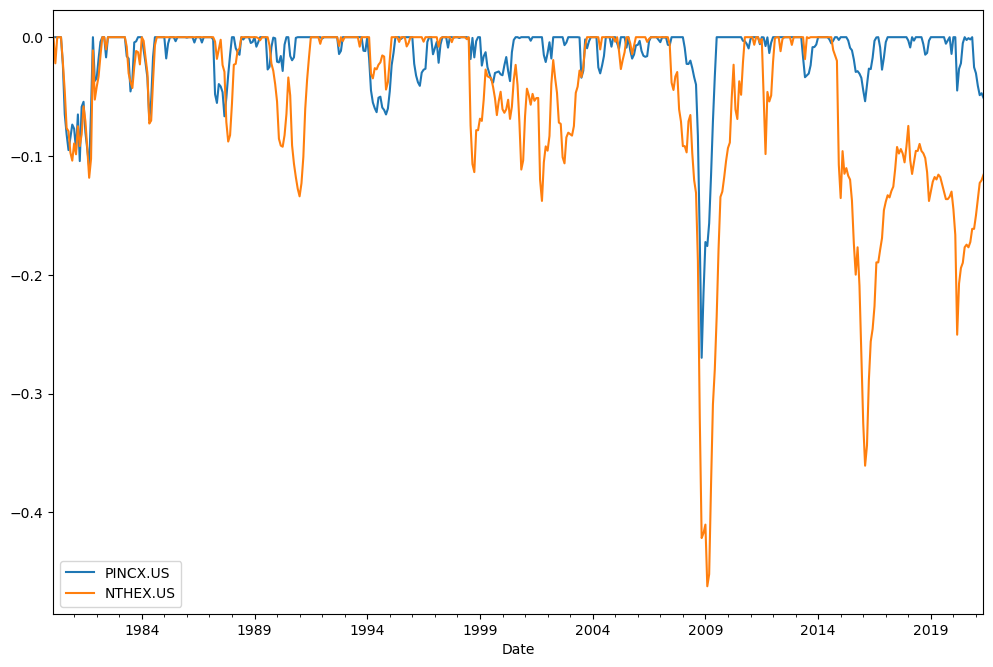

In [28]:
bonds.drawdowns.plot()

### Long Term Stocks

In [31]:
dji = ok.AssetList(['DJI.INDX'])

<AxesSubplot:xlabel='Date'>

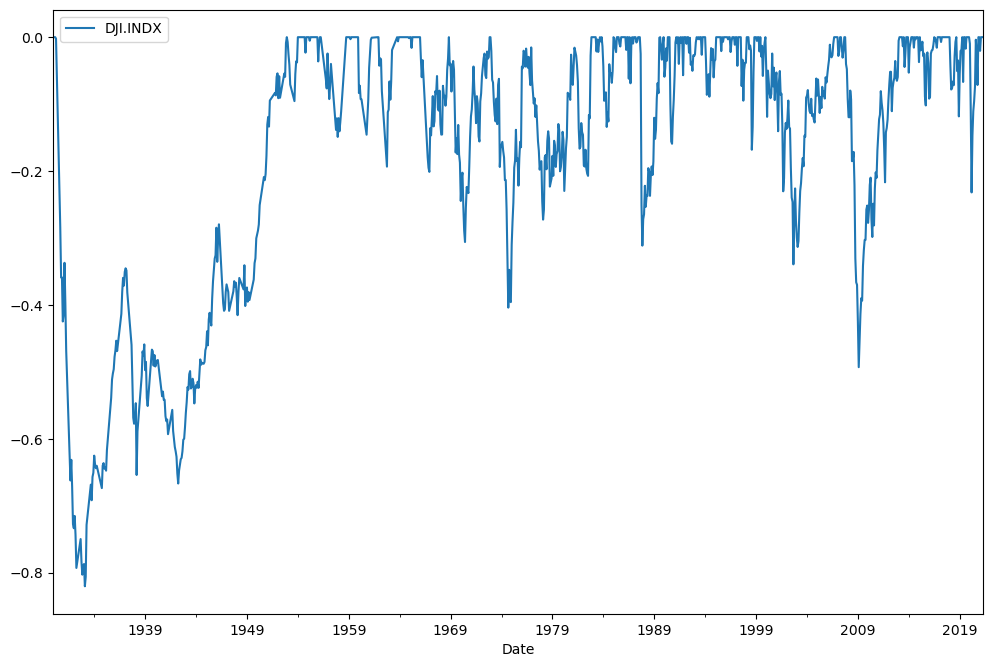

In [32]:
dji.drawdowns.plot()

In [33]:
dji.recovery_periods / 12

DJI.INDX    16.166667
dtype: float64

### Assets US Portfolio

In [3]:
assets1 = ['PINCX.US', 'VFINX.US', 'FNER.INDX', 'GC.COMM']
assets2 = ['VBMFX.US', 'VFINX.US', 'FNER.INDX', 'GC.COMM']

In [4]:
labels = ['Облигации', 'Акции', 'Недвижимость', 'Золото']

### Weights US portfolio (4 assets)

In [5]:
# Bonds, Stocks, REIT, Gold
wc = [0.55, 0.25, 0.15, 0.05]
sum(wc)

1.0

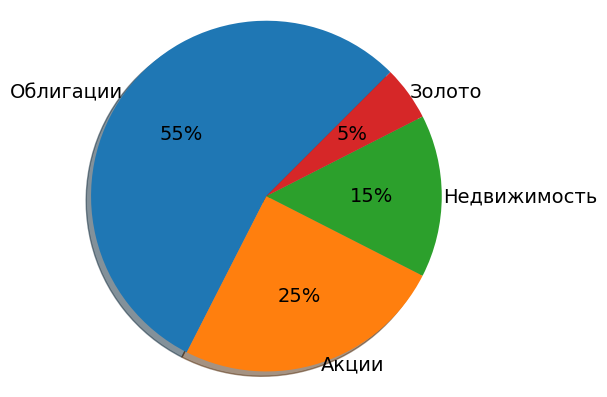

In [5]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(wc, labels=labels, autopct='%1.0f%%', shadow=True, startangle=45, labeldistance=1.01, textprops={'fontsize': 14})
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

In [6]:
# Bonds, Stocks, REIT, Gold
wb = [0.40, 0.40, 0.10, 0.10]
sum(wb)

1.0

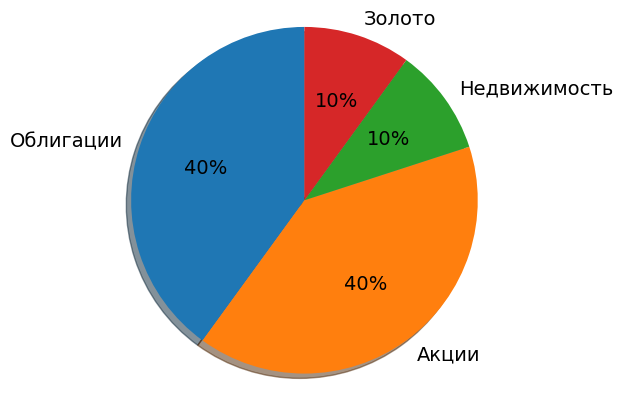

In [7]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(wb, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90, labeldistance=1.1, textprops={'fontsize': 14})
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

In [7]:
# Bonds, Stocks, REIT, Gold
wa = [0.10, 0.60, 0.10, 0.20]
sum(wa)

1.0

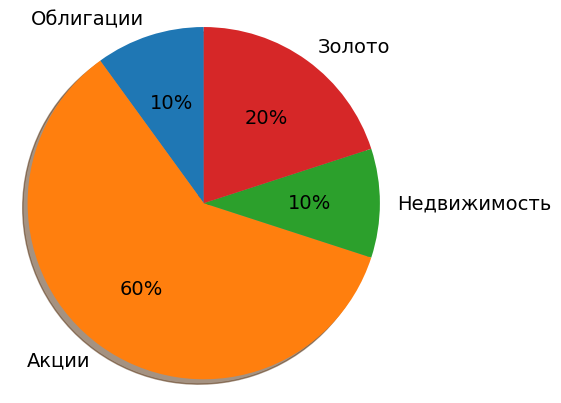

In [9]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(wa, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90, labeldistance=1.1, textprops={'fontsize': 14})
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

### Black Monday, 1987

In [10]:
fd = '1987-01'
ld = '1991-01'

In [11]:
al = ok.AssetList(assets1, first_date=fd, last_date=ld)
al

symbols          [PINCX.US, VFINX.US, FNER.INDX, GC.COMM]
currency                                              USD
first_date                                        1987-01
last_date                                         1991-01
period_length                           4 years, 1 months
inflation                                        USD.INFL
dtype: object

Text(0.5, 1.0, 'Черный понедельник. Глубина просадки активов')

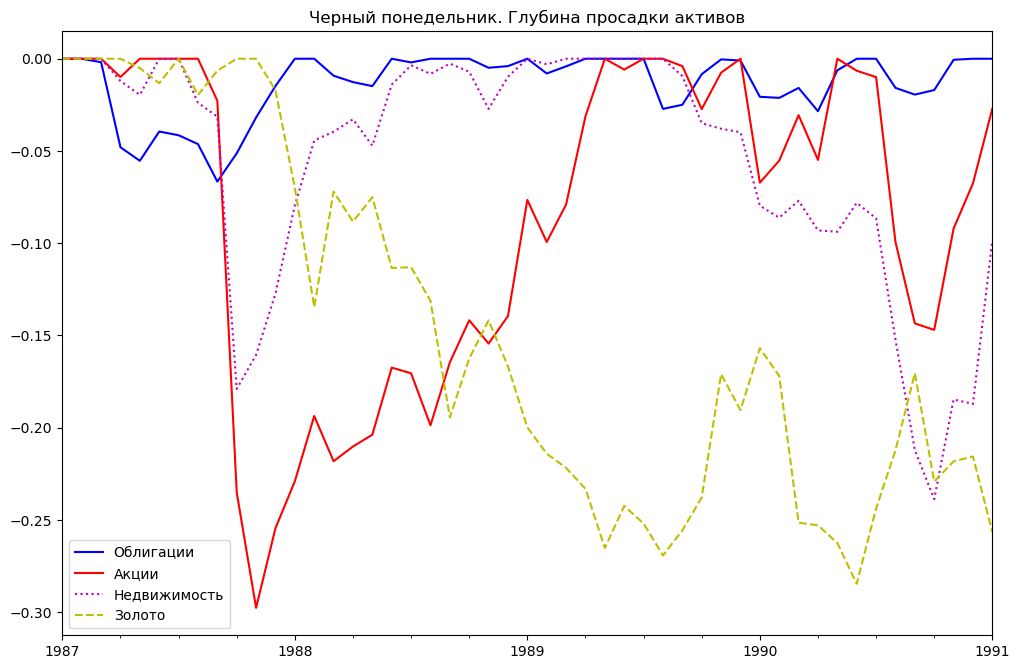

In [18]:
fig, ax = plt.subplots()
al.drawdowns.plot(ax=ax, style=['b-', 'r-', 'm:', 'y--'])
ax.legend(['Облигации', 'Акции', 'Недвижимость', 'Золото'])
ax.set_title('Черный понедельник. Глубина просадки активов')

In [38]:
pf_con = ok.Portfolio(assets1, weights=wc, first_date=fd, last_date=ld, symbol='Conservative.PF')
pf_bal = ok.Portfolio(assets1, weights=wb, symbol='Balanced.PF')
pf_agg = ok.Portfolio(assets1, weights=wa, symbol='Aggressive.PF')

In [35]:
pf_con.table

,asset name,ticker,weights
0,PUTNAM INCOME FUND CLASS A SHARES,PINCX.US,0.55
1,VANGUARD 500 INDEX FUND INVESTOR SHARES,VFINX.US,0.25
2,FTSE NAREIT All Equity REITs,FNER.INDX,0.15
3,Gold,GC.COMM,0.05


In [39]:
al_pf = ok.AssetList([pf_con, pf_bal, pf_agg])
al_pf

symbols          [Conservative.PF, Balanced.PF, Aggressive.PF]
currency                                                   USD
first_date                                             2007-01
last_date                                              2013-01
period_length                                6 years, 1 months
inflation                                             USD.INFL
dtype: object

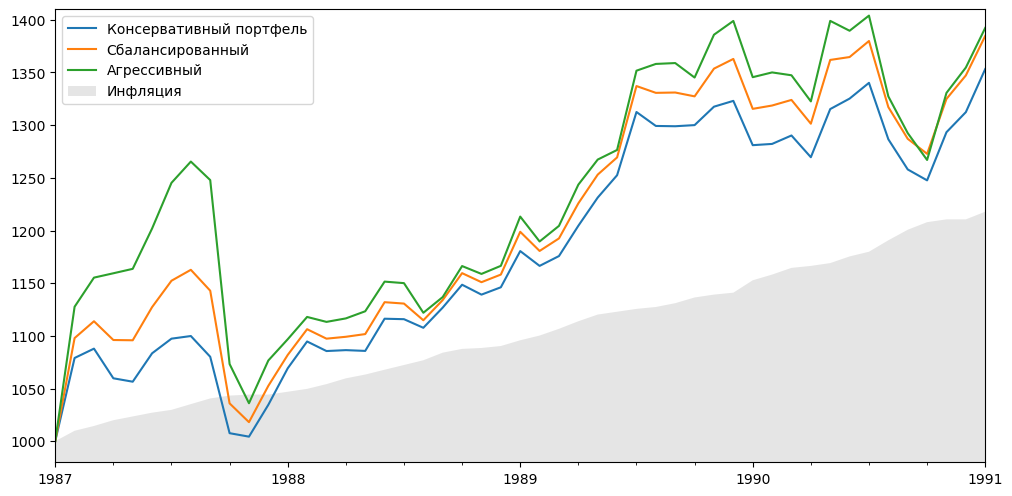

In [45]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
al_pf.wealth_indexes.iloc[:,: -1].plot(ax=ax)
ax.fill_between(al_pf.wealth_indexes.index.to_timestamp(), 0, al_pf.wealth_indexes.iloc[:,-1], facecolor='grey', alpha=0.2, label='Инфляция')

ax.set_xlim('1987-01', '1991-01')
ax.set_ylim(980, 1410)

leg = ax.legend(['Консервативный портфель', 'Сбалансированный', 'Агрессивный', 'Инфляция'])

In [47]:
df = al_pf.wealth_indexes

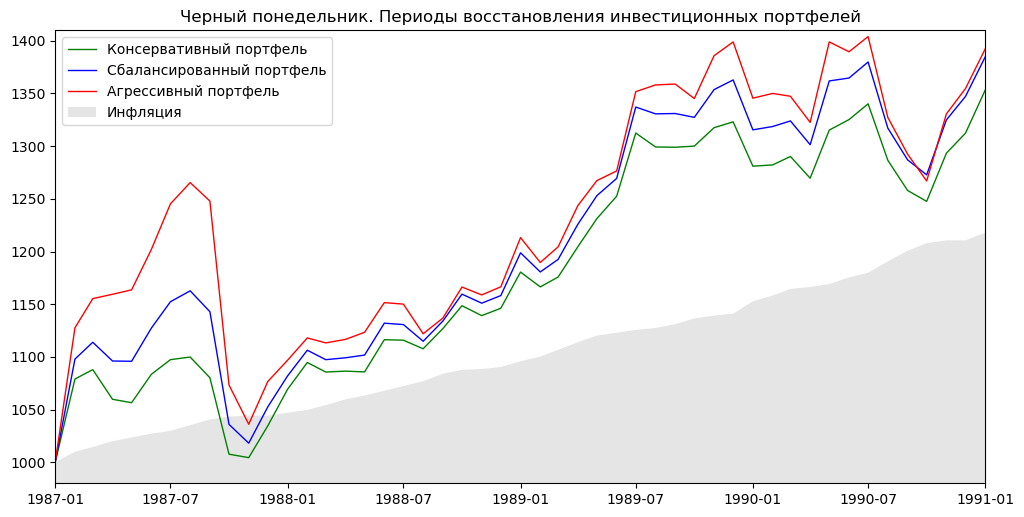

In [49]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['Conservative.PF'], color = 'green', linewidth = 1, label='Консервативный портфель')
ax.plot(df.index.to_timestamp(), df['Balanced.PF'], color = 'blue', linewidth = 1, label='Сбалансированный портфель')
ax.plot(df.index.to_timestamp(), df['Aggressive.PF'], color = 'red', linewidth = 1, label='Агрессивный портфель')

ax.fill_between(df.index.to_timestamp(), 0, df['USD.INFL'], facecolor='grey', alpha=0.2, label='Инфляция')

ax.set_xlim('1987-01', '1991-01')
ax.set_ylim(980, 1410)

ax.set_title('Черный понедельник. Периоды восстановления инвестиционных портфелей')

leg = ax.legend()

In [317]:
al.drawdowns.min()

PINCX.US    -0.066596
VFINX.US    -0.297711
FNER.INDX   -0.238771
GC.COMM     -0.284661
dtype: float64

In [176]:
al.recovery_periods / 12

PINCX.US     0.833333
VFINX.US     1.666667
FNER.INDX    1.500000
GC.COMM      3.166667
dtype: float64

In [327]:
al_pf.drawdowns.min()

Conservative.PF   -0.086844
Balanced.PF       -0.124377
Aggressive.PF     -0.181274
dtype: float64

In [50]:
al_pf.recovery_periods / 12

Conservative.PF    0.750000
Balanced.PF        1.333333
Aggressive.PF      1.666667
dtype: float64

### Dotcom Bubble, 2000 - 2005

In [8]:
fd = '1999-01'
ld = '2007-01'

In [9]:
al = ok.AssetList(assets2, first_date=fd, last_date=ld)

Text(0.5, 1.0, 'Кризис доткомов. Глубина просадки активов')

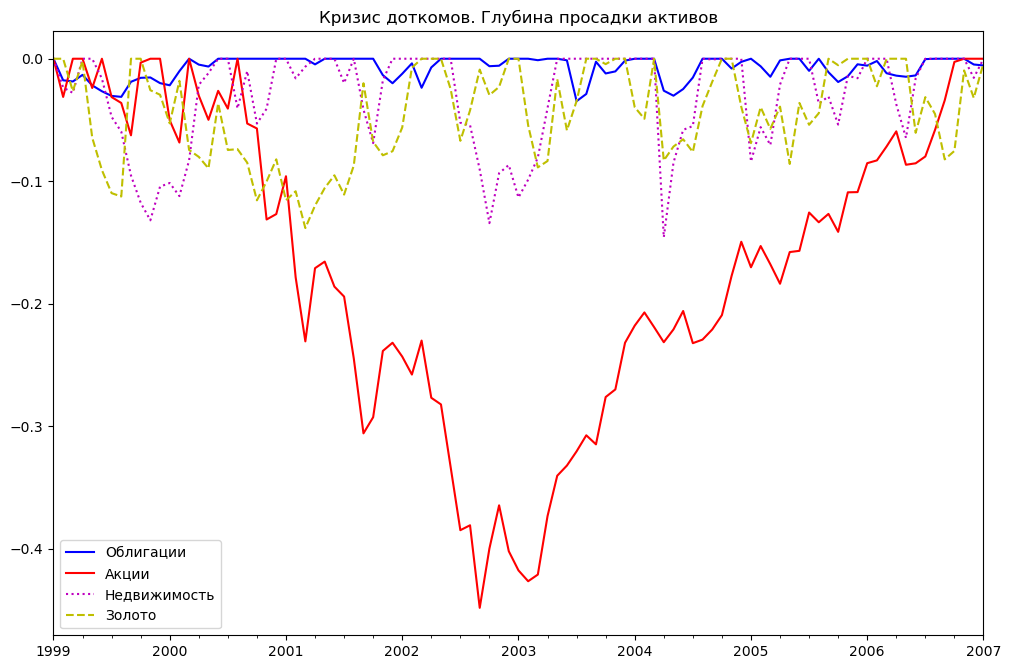

In [10]:
fig, ax = plt.subplots()
al.drawdowns.plot(ax=ax, style=['b-', 'r-', 'm:', 'y--'])
ax.legend(['Облигации', 'Акции', 'Недвижимость', 'Золото'])
ax.set_title('Кризис доткомов. Глубина просадки активов')

In [54]:
pf_con = ok.Portfolio(assets2, weights=wc, first_date=fd, last_date=ld, symbol='Conservative.PF')
pf_bal = ok.Portfolio(assets2, weights=wb, symbol='Balanced.PF')
pf_agg = ok.Portfolio(assets2, weights=wa, symbol='Aggressive.PF')

In [55]:
pf_con.names

{'VBMFX.US': 'VANGUARD TOTAL BOND MARKET INDEX FUND INVESTOR SHARES',
 'VFINX.US': 'VANGUARD 500 INDEX FUND INVESTOR SHARES',
 'FNER.INDX': 'FTSE NAREIT All Equity REITs',
 'GC.COMM': 'Gold'}

In [56]:
al_pf = ok.AssetList([pf_con, pf_bal, pf_agg])
al_pf

symbols          [Conservative.PF, Balanced.PF, Aggressive.PF]
currency                                                   USD
first_date                                             1999-01
last_date                                              2007-01
period_length                                8 years, 1 months
inflation                                             USD.INFL
dtype: object

In [58]:
df = al_pf.wealth_indexes

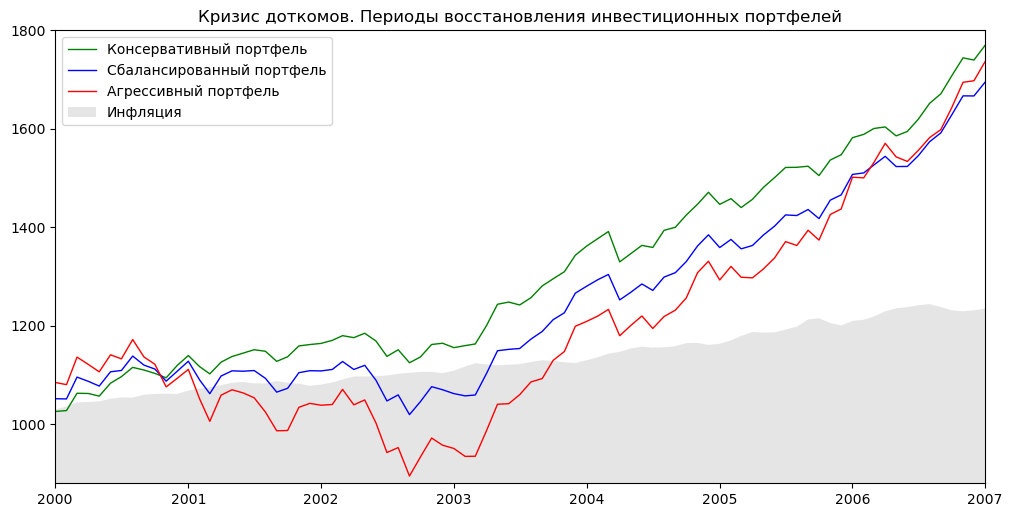

In [63]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['Conservative.PF'], color = 'green', linewidth = 1, label='Консервативный портфель')
ax.plot(df.index.to_timestamp(), df['Balanced.PF'], color = 'blue', linewidth = 1, label='Сбалансированный портфель')
ax.plot(df.index.to_timestamp(), df['Aggressive.PF'], color = 'red', linewidth = 1, label='Агрессивный портфель')

ax.fill_between(df.index.to_timestamp(), 0, df['USD.INFL'], facecolor='grey', alpha=0.2, label='Инфляция')

ax.set_xlim('2000-01', '2007-01')
ax.set_ylim(880, 1800)

ax.set_title('Кризис доткомов. Периоды восстановления инвестиционных портфелей')

leg = ax.legend()

In [348]:
al.drawdowns.min()

VBMFX.US    -0.034653
VFINX.US    -0.448420
FNER.INDX   -0.145800
GC.COMM     -0.138281
dtype: float64

In [61]:
al.recovery_periods / 12

VBMFX.US     1.000000
VFINX.US     6.166667
FNER.INDX    1.000000
GC.COMM      2.333333
dtype: float64

In [352]:
al_pf.drawdowns.min()

Conservative.PF   -0.050579
Balanced.PF       -0.102596
Aggressive.PF     -0.236155
dtype: float64

In [62]:
al_pf.recovery_periods / 12

Conservative.PF    0.833333
Balanced.PF        2.666667
Aggressive.PF      3.250000
dtype: float64

In [191]:
al_pf.describe()

,property,period,Aggressive.PF,Balanced.PF,Conservative.PF,inflation
0,Compound return,YTD,-0.028610,-0.018680,-0.016690,0.002100
1,CAGR,1 years,0.070450,0.064585,0.066656,0.029642
2,CAGR,5 years,0.035982,0.053620,0.072623,0.024681
3,CAGR,10 years,NaN,NaN,NaN,NaN
4,CAGR,"7 years, 1 months",0.058445,0.062977,0.067369,0.023904
5,Risk,"7 years, 1 months",0.116225,0.078330,0.058419,NaN
6,CVAR,"7 years, 1 months",0.131935,0.060389,0.014356,NaN
7,Max drawdowns,"7 years, 1 months",-0.236155,-0.102596,-0.054391,NaN
8,Max drawdowns dates,"7 years, 1 months",2002-09,2002-09,1998-08,NaN
9,Inception date,None,1987-12,1987-12,1998-01,1998-01


### US Housing Bubble. 2007-2009

In [9]:
fd = '2007-01'
ld = '2013-01'

In [10]:
al = ok.AssetList(assets2, first_date=fd, last_date=ld)

Text(0.5, 1.0, 'Ипотечный кризис США. Глубина просадки активов')

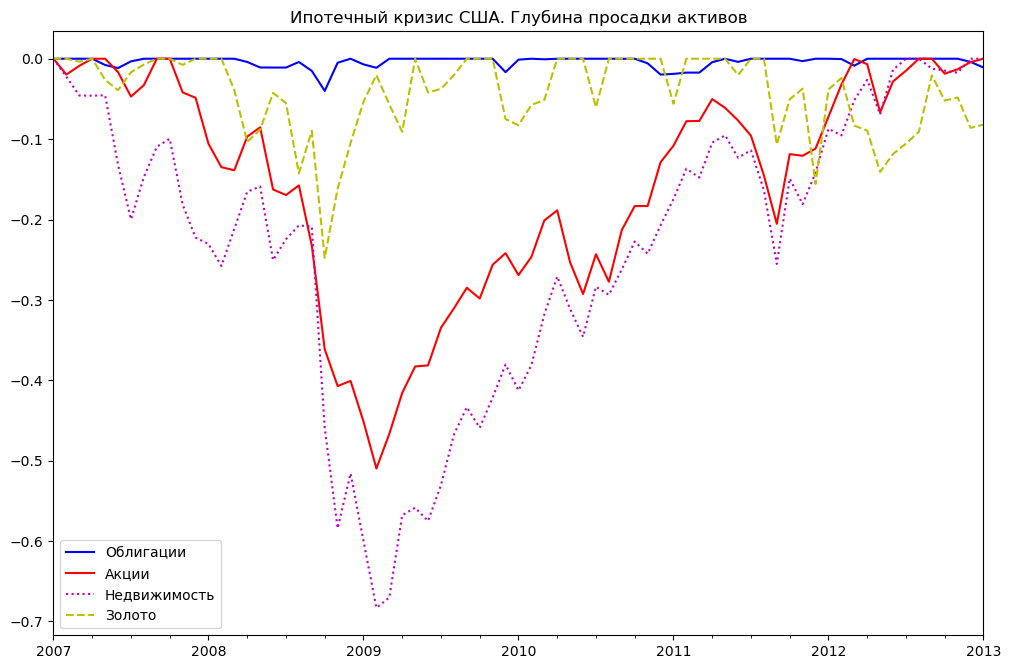

In [11]:
fig, ax = plt.subplots()
al.drawdowns.plot(ax=ax, style=['b-', 'r-', 'm:', 'y--'])
ax.legend(['Облигации', 'Акции', 'Недвижимость', 'Золото'])
ax.set_title('Ипотечный кризис США. Глубина просадки активов')

In [12]:
pf_con = ok.Portfolio(assets2, weights=wc, first_date=fd, last_date=ld, symbol='Conservative.PF')
pf_bal = ok.Portfolio(assets2, weights=wb, symbol='Balanced.PF')
pf_agg = ok.Portfolio(assets2, weights=wa, symbol='Aggressive.PF')

In [13]:
al_pf = ok.AssetList([pf_con, pf_bal, pf_agg])
al_pf

symbols          [Conservative.PF, Balanced.PF, Aggressive.PF]
currency                                                   USD
first_date                                             2007-01
last_date                                              2013-01
period_length                                6 years, 1 months
inflation                                             USD.INFL
dtype: object

In [14]:
df = al_pf.wealth_indexes

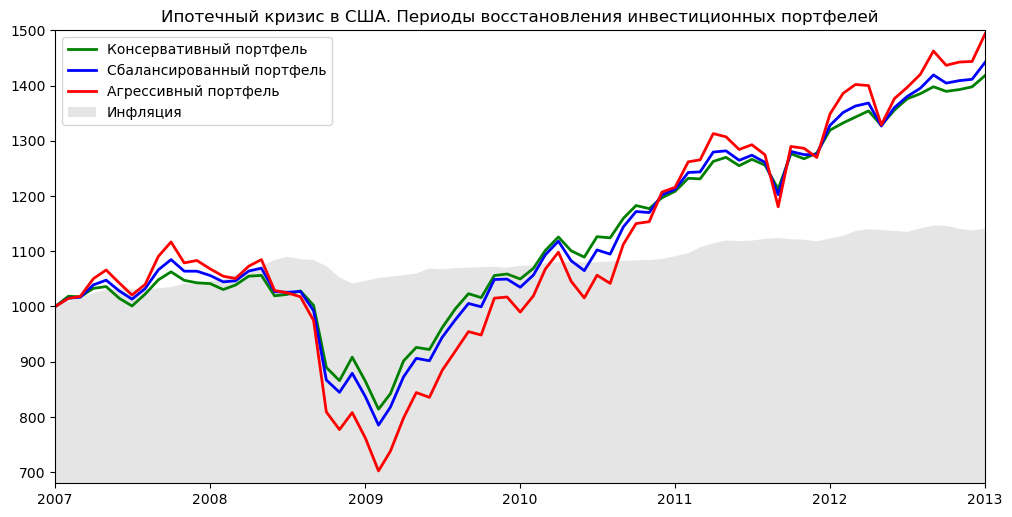

In [16]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['Conservative.PF'], color = 'green', linewidth = 2, label='Консервативный портфель')
ax.plot(df.index.to_timestamp(), df['Balanced.PF'], color = 'blue', linewidth = 2, label='Сбалансированный портфель')
ax.plot(df.index.to_timestamp(), df['Aggressive.PF'], color = 'red', linewidth = 2, label='Агрессивный портфель')

ax.fill_between(df.index.to_timestamp(), 0, df['USD.INFL'], facecolor='grey', alpha=0.2, label='Инфляция')

ax.set_xlim('2007-01', '2013-01')
ax.set_ylim(680, 1500)

ax.set_title('Ипотечный кризис в США. Периоды восстановления инвестиционных портфелей')

leg = ax.legend()

In [366]:
al.drawdowns.min()

VBMFX.US    -0.039926
VFINX.US    -0.509709
FNER.INDX   -0.683038
GC.COMM     -0.247843
dtype: float64

In [359]:
al.recovery_periods / 12

VBMFX.US     0.666667
VFINX.US     4.750000
FNER.INDX    5.250000
GC.COMM      1.416667
dtype: float64

In [367]:
al_pf.drawdowns.min()

Conservative.PF   -0.233874
Balanced.PF       -0.276105
Aggressive.PF     -0.371073
dtype: float64

In [360]:
al_pf.recovery_periods / 12

Conservative.PF    2.250000
Balanced.PF        2.333333
Aggressive.PF      2.916667
dtype: float64

In [213]:
al_pf.describe()

,property,period,Aggressive.PF,Balanced.PF,Conservative.PF,inflation
0,Compound return,YTD,0.034900,0.021940,0.014700,0.003000
1,CAGR,1 years,0.107775,0.085078,0.073511,0.016036
2,CAGR,5 years,0.069139,0.063307,0.062354,0.017558
3,CAGR,10 years,NaN,NaN,NaN,NaN
4,CAGR,"6 years, 1 months",0.068008,0.061241,0.058011,0.021917
5,Risk,"6 years, 1 months",0.153480,0.110578,0.097000,NaN
6,CVAR,"6 years, 1 months",0.334114,0.248222,0.210105,NaN
7,Max drawdowns,"6 years, 1 months",-0.371073,-0.276105,-0.233874,NaN
8,Max drawdowns dates,"6 years, 1 months",2009-02,2009-02,2009-02,NaN
9,Inception date,None,1987-12,1987-12,2007-01,2007-01


### Russian Assets in 2008

### Portfolio long term risk and return

In [1]:
fd = '2007-01'
ld = '2013-01'

### Assets MIX Portfolio 

In [2]:
assets_ru = ['RGBITR.INDX', 'VBMFX.US', 'MCFTR.INDX', 'VFINX.US', 'FNER.INDX', 'GC.COMM']

In [3]:
labels = ['Облигации RU', 'Облигации US', 'Акции RU', 'Акции US', 'Недвижимость', 'Золото']

### Weights MIX RU-US Portfolio (6 assets), currency is RUB

In [10]:
curr = 'USD'

In [13]:
# Bonds RU, Bonds US, Stocks RU, Stocks US, REIT, Gold
wc = [0.40, 0.15, 0.12, 0.13, 0.15, 0.05]
sum(wc)

1.0

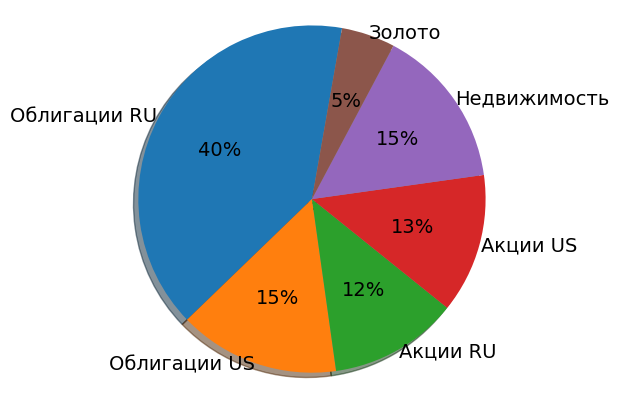

In [14]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(wc, labels=labels, autopct='%1.0f%%', shadow=True, startangle=80, labeldistance=1.01, textprops={'fontsize': 14})
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

In [15]:
# Bonds RU, Bonds US, Stocks RU, Stocks US, REIT, Gold
wb = [0.20, 0.20, 0.20, 0.20, 0.10, 0.10]
sum(wb)

1.0

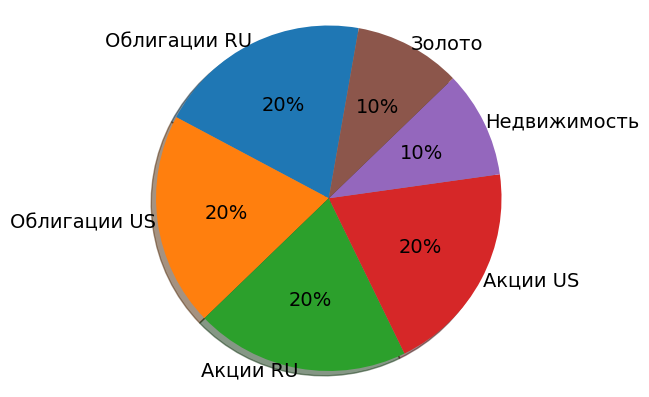

In [16]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(wb, labels=labels, autopct='%1.0f%%', shadow=True, startangle=80, labeldistance=1.01, textprops={'fontsize': 14})
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

In [17]:
# Bonds RU, Bonds US, Stocks RU, Stocks US, REIT, Gold
wa = [0.05, 0.05, 0.30, 0.30, 0.10, 0.20]
sum(wa)

1.0

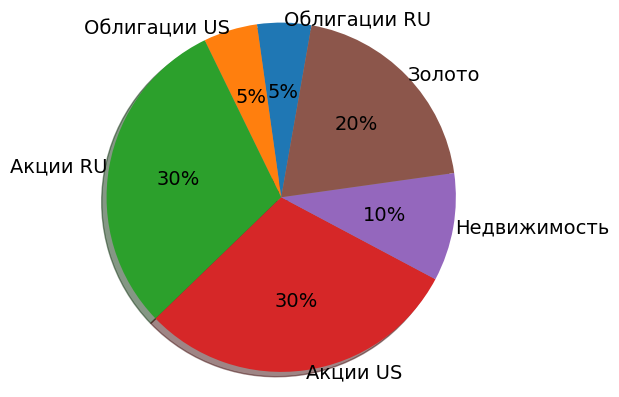

In [18]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(wa, labels=labels, autopct='%1.0f%%', shadow=True, startangle=80, labeldistance=1.01, textprops={'fontsize': 14})
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

#### Asset List

In [11]:
al = ok.AssetList(assets_ru, first_date=fd, last_date=ld, ccy=curr)
al

symbols          [RGBITR.INDX, VBMFX.US, MCFTR.INDX, VFINX.US, ...
currency                                                       USD
first_date                                                 2007-01
last_date                                                  2013-01
period_length                                    6 years, 1 months
inflation                                                 USD.INFL
dtype: object

<AxesSubplot:>

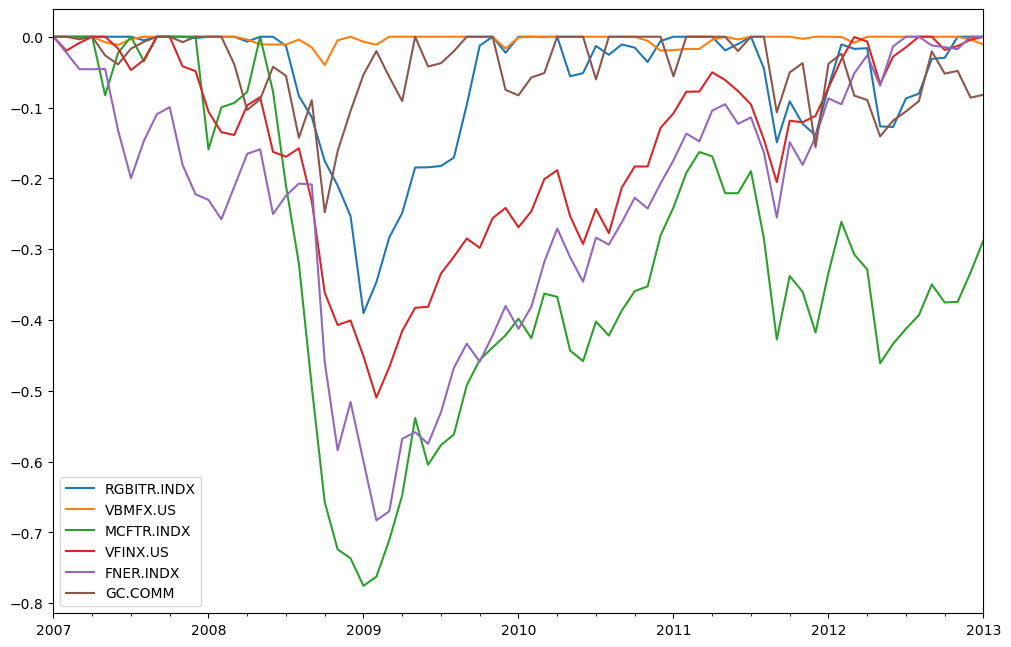

In [9]:
al.drawdowns.plot()

In [37]:
pf_con = ok.Portfolio(assets_ru, weights=wc, first_date=fd, last_date=ld, symbol='Conservative.PF', ccy=curr)
pf_bal = ok.Portfolio(assets_ru, weights=wb, symbol='Balanced.PF', ccy=curr)
pf_agg = ok.Portfolio(assets_ru, weights=wa, symbol='Aggressive.PF', ccy=curr)

ValueError: Number of tickers (6) should be equal to the weights number (4)

In [266]:
pf_con.table

,asset name,ticker,weights
0,Russian Government Bond Index,RGBITR.INDX,0.40
1,VANGUARD TOTAL BOND MARKET INDEX FUND INVESTOR...,VBMFX.US,0.15
2,MOEX Total Return,MCFTR.INDX,0.12
3,VANGUARD 500 INDEX FUND INVESTOR SHARES,VFINX.US,0.13
4,FTSE NAREIT All Equity REITs,FNER.INDX,0.15
5,Gold,GC.COMM,0.05


In [20]:
al_pf = ok.AssetList([pf_con, pf_bal, pf_agg])
al_pf

symbols          [Conservative.PF, Balanced.PF, Aggressive.PF]
currency                                                   USD
first_date                                             2007-01
last_date                                              2013-01
period_length                                6 years, 1 months
inflation                                             USD.INFL
dtype: object

<AxesSubplot:>

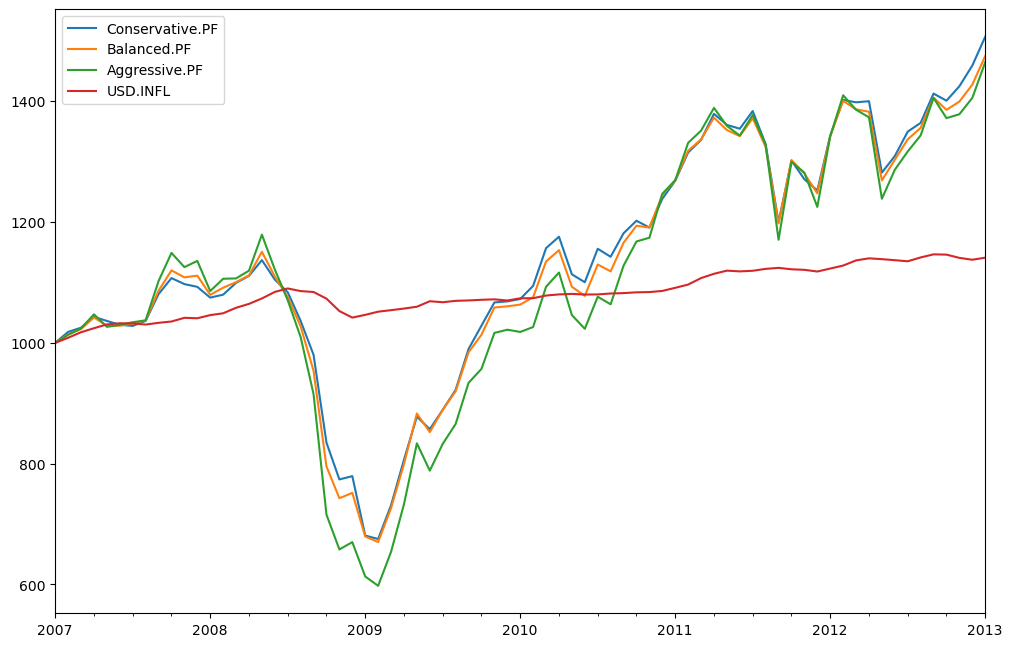

In [21]:
al_pf.wealth_indexes.plot(logy=False)

In [362]:
df = al_pf.wealth_indexes

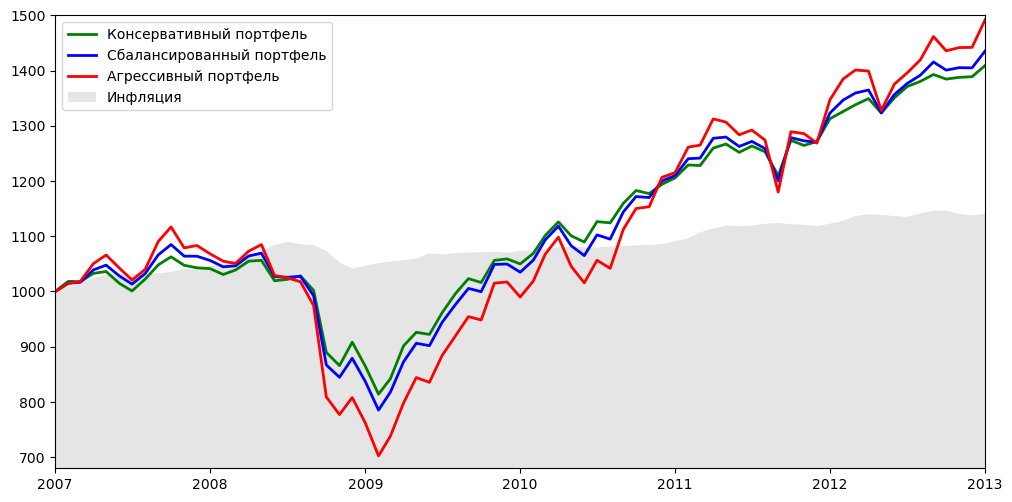

In [388]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['Conservative.PF'], color = 'green', linewidth = 2, label='Консервативный портфель')
ax.plot(df.index.to_timestamp(), df['Balanced.PF'], color = 'blue', linewidth = 2, label='Сбалансированный портфель')
ax.plot(df.index.to_timestamp(), df['Aggressive.PF'], color = 'red', linewidth = 2, label='Агрессивный портфель')

ax.fill_between(df.index.to_timestamp(), 0, df['USD.INFL'], facecolor='grey', alpha=0.2, label='Инфляция')

ax.set_xlim('2007-01', '2013-01')
ax.set_ylim(680, 1500)

leg = ax.legend()

In [389]:
al.drawdowns.min()

RGBITR.INDX   -0.079350
VBMFX.US      -0.125703
MCFTR.INDX    -0.679146
VFINX.US      -0.356165
FNER.INDX     -0.577235
GC.COMM       -0.172156
dtype: float64

In [390]:
al.recovery_periods / 12

RGBITR.INDX    0.666667
VBMFX.US       1.666667
MCFTR.INDX     2.750000
VFINX.US       3.416667
FNER.INDX      4.583333
GC.COMM        0.750000
dtype: float64

In [22]:
al_pf.drawdowns.min()

Conservative.PF   -0.406146
Balanced.PF       -0.417674
Aggressive.PF     -0.493086
dtype: float64

In [23]:
al_pf.recovery_periods / 12

Conservative.PF    1.750000
Balanced.PF        1.833333
Aggressive.PF      2.500000
dtype: float64

In [213]:
al_pf.describe()

,property,period,Aggressive.PF,Balanced.PF,Conservative.PF,inflation
0,Compound return,YTD,0.034900,0.021940,0.014700,0.003000
1,CAGR,1 years,0.107775,0.085078,0.073511,0.016036
2,CAGR,5 years,0.069139,0.063307,0.062354,0.017558
3,CAGR,10 years,NaN,NaN,NaN,NaN
4,CAGR,"6 years, 1 months",0.068008,0.061241,0.058011,0.021917
5,Risk,"6 years, 1 months",0.153480,0.110578,0.097000,NaN
6,CVAR,"6 years, 1 months",0.334114,0.248222,0.210105,NaN
7,Max drawdowns,"6 years, 1 months",-0.371073,-0.276105,-0.233874,NaN
8,Max drawdowns dates,"6 years, 1 months",2009-02,2009-02,2009-02,NaN
9,Inception date,None,1987-12,1987-12,2007-01,2007-01


### Portfolio long term risk and return

####  33 years

In [31]:
pf_con_lt_us = ok.Portfolio(assets2, weights=wc, symbol='Conservative.PF')
pf_bal_lt_us = ok.Portfolio(assets2, weights=wb, symbol='Balanced.PF')
pf_agg_lt_us = ok.Portfolio(assets2, weights=wa, symbol='Aggressive.PF')

In [32]:
pf_con_lt_us

symbol                                         Conservative.PF
symbols               [VBMFX.US, VFINX.US, FNER.INDX, GC.COMM]
weights                               [0.55, 0.25, 0.15, 0.05]
rebalancing period                                       month
currency                                                   USD
inflation                                             USD.INFL
first date                                             1987-09
last_date                                              2021-05
period length                               33 years, 9 months
dtype: object

In [34]:
assets3 = [pf_con_lt_us, pf_bal_lt_us, pf_agg_lt_us] + assets2
x = ok.AssetList(assets3)
x

symbols          [Conservative.PF, Balanced.PF, Aggressive.PF, ...
currency                                                       USD
first_date                                                 1987-09
last_date                                                  2021-05
period_length                                   33 years, 9 months
inflation                                                 USD.INFL
dtype: object

#### 18 years (from 2003)

#### US

In [26]:
currency='USD'

In [464]:
fd = '2003-03'

In [465]:
al_us = ok.AssetList(assets2, first_date=fd, ccy='USD')
al_us

symbols          [VBMFX.US, VFINX.US, FNER.INDX, GC.COMM]
currency                                              USD
first_date                                        2003-03
last_date                                         2021-04
period_length                          18 years, 2 months
inflation                                        USD.INFL
dtype: object

<AxesSubplot:>

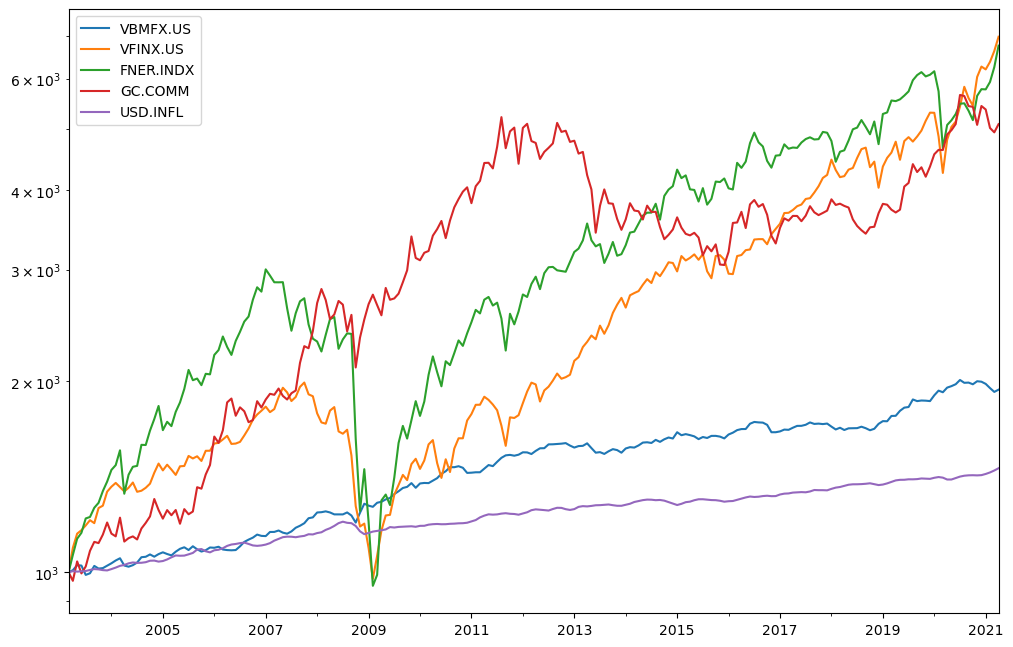

In [466]:
al_us.wealth_indexes.plot(logy=True)

In [467]:
pf_con_lt_us = ok.Portfolio(assets2, weights=wc, first_date=fd, symbol='Conservative.PF', ccy=currency)
pf_bal_lt_us = ok.Portfolio(assets2, weights=wb, symbol='Balanced.PF', ccy=currency)
pf_agg_lt_us = ok.Portfolio(assets2, weights=wa, symbol='Aggressive.PF', ccy=currency)

In [468]:
al_pf_lt_us = ok.AssetList([pf_con_lt_us, pf_bal_lt_us, pf_agg_lt_us], ccy=currency)
al_pf_lt_us

symbols          [Conservative.PF, Balanced.PF, Aggressive.PF]
currency                                                   USD
first_date                                             2003-03
last_date                                              2021-04
period_length                               18 years, 2 months
inflation                                             USD.INFL
dtype: object

<AxesSubplot:>

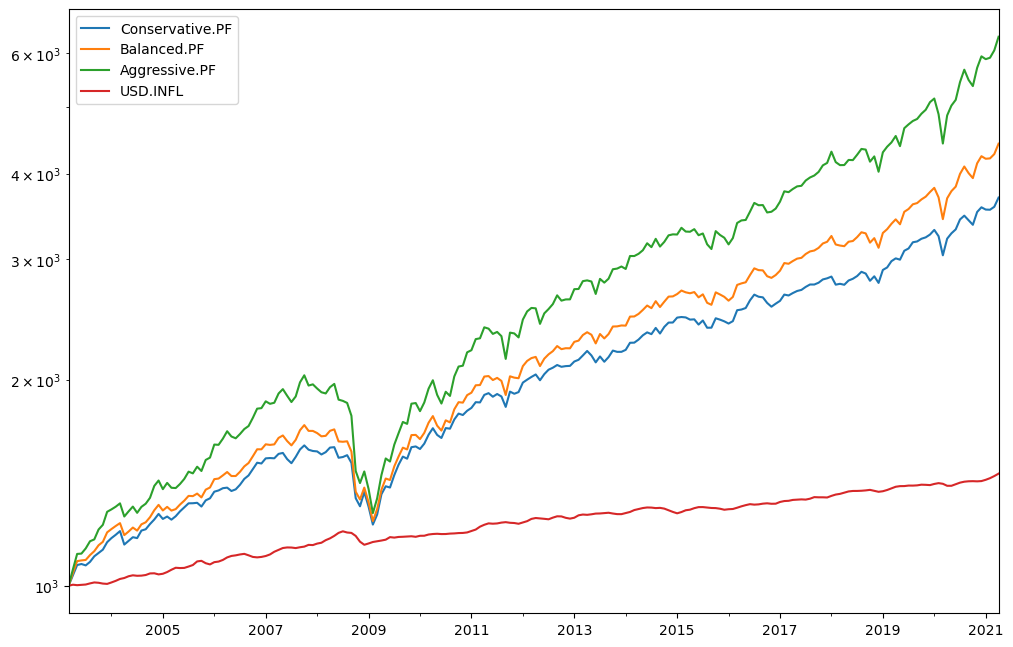

In [469]:
al_pf_lt_us.wealth_indexes.plot(logy=True)

<AxesSubplot:>

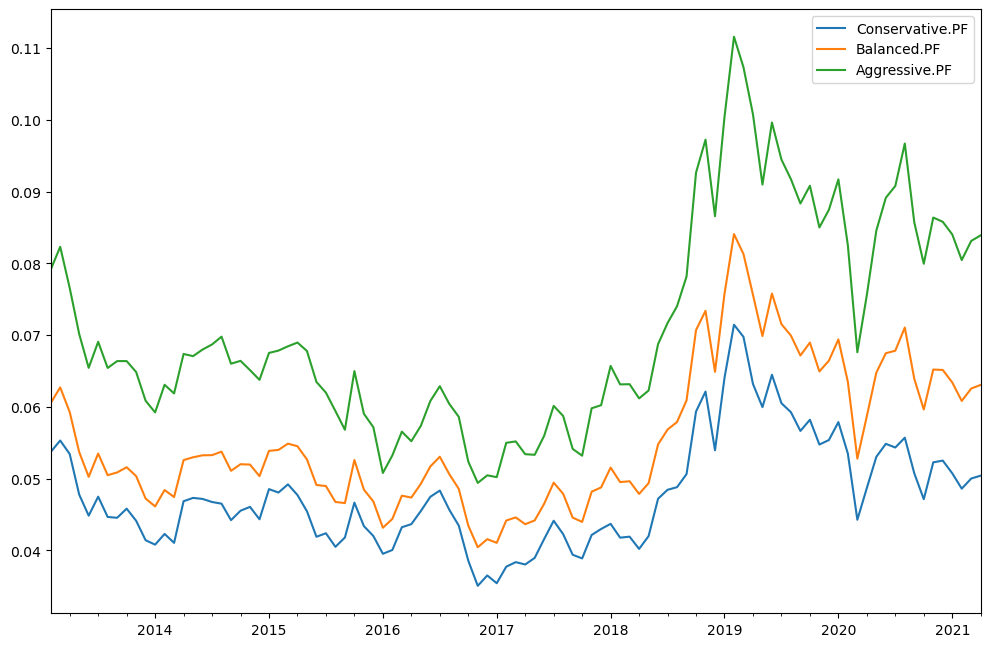

In [470]:
al_pf_lt_us.get_rolling_cagr(window=12*10, real=True).plot()

In [471]:
al_pf_lt_us.describe([5, 15, 18])

,property,period,Aggressive.PF,Balanced.PF,Conservative.PF,inflation
0,Compound return,YTD,0.068157,0.043016,0.033216,0.025333
1,CAGR,5 years,0.131578,0.098581,0.078250,0.022238
2,CAGR,15 years,0.092528,0.076431,0.067225,0.018970
3,CAGR,18 years,0.104730,0.083614,0.073208,0.020977
4,CAGR,"18 years, 2 months",0.107049,0.085336,0.074555,0.020995
5,Risk,"18 years, 2 months",0.122419,0.087064,0.075066,NaN
6,CVAR,"18 years, 2 months",0.306111,0.224761,0.190963,NaN
7,Max drawdowns,"18 years, 2 months",-0.371073,-0.276105,-0.233874,NaN
8,Max drawdowns dates,"18 years, 2 months",2009-02,2009-02,2009-02,NaN
9,Inception date,None,1987-12,1987-12,2003-03,2003-03


#### US + RUS

In [472]:
currency='USD'

In [473]:
al_mix = ok.AssetList(assets_ru, ccy=currency)
al_mix

symbols          [RGBITR.INDX, VBMFX.US, MCFTR.INDX, VFINX.US, ...
currency                                                       USD
first_date                                                 2003-03
last_date                                                  2021-04
period_length                                   18 years, 2 months
inflation                                                 USD.INFL
dtype: object

<AxesSubplot:>

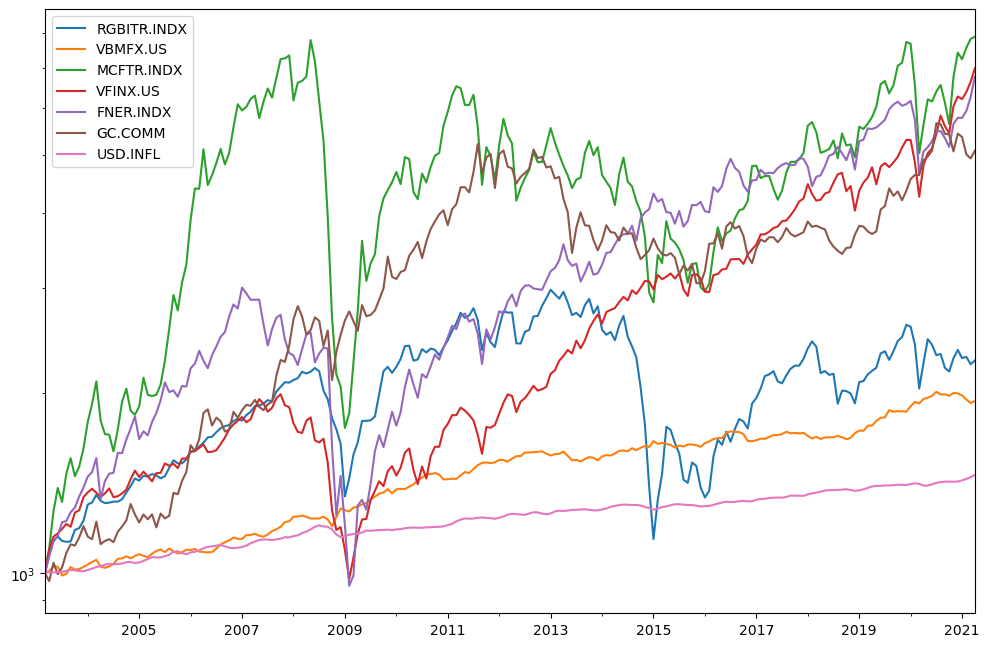

In [474]:
al_mix.wealth_indexes.plot(logy=True)

In [479]:
pf_con_lt_mix = ok.Portfolio(assets_ru, weights=wc, symbol='Conservative.PF', ccy=currency)
pf_bal_lt_mix = ok.Portfolio(assets_ru, weights=wb, symbol='Balanced.PF', ccy=currency)
pf_agg_lt_mix = ok.Portfolio(assets_ru, weights=wa, symbol='Aggressive.PF', ccy=currency)

In [480]:
al_pf_lt_mix = ok.AssetList([pf_con_lt_mix, pf_bal_lt_mix, pf_agg_lt_mix], ccy=currency)
al_pf_lt_mix

symbols          [Conservative.PF, Balanced.PF, Aggressive.PF]
currency                                                   USD
first_date                                             2003-03
last_date                                              2021-04
period_length                               18 years, 2 months
inflation                                             USD.INFL
dtype: object

<AxesSubplot:>

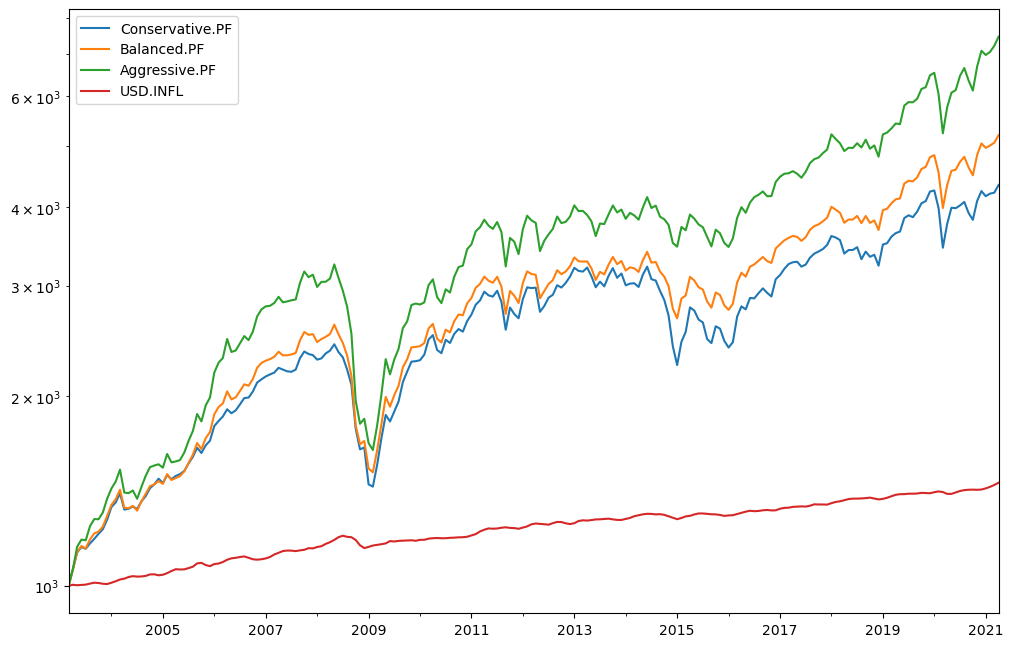

In [481]:
al_pf_lt_mix.wealth_indexes.plot(logy=True)

<AxesSubplot:>

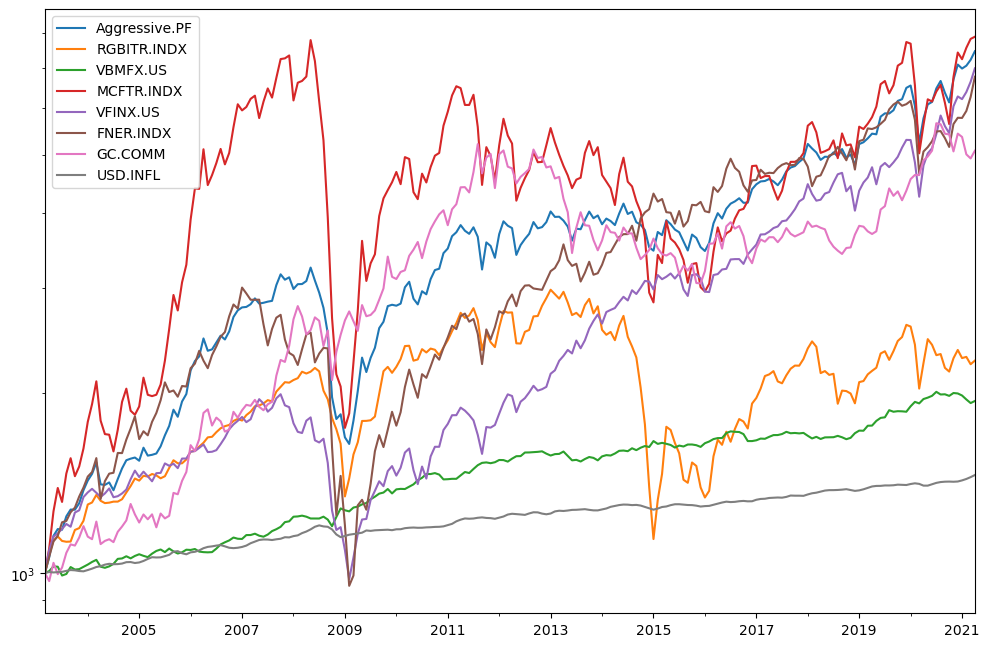

In [482]:
pf_agg_lt_mix.wealth_index_with_assets.plot(logy=True)

<AxesSubplot:>

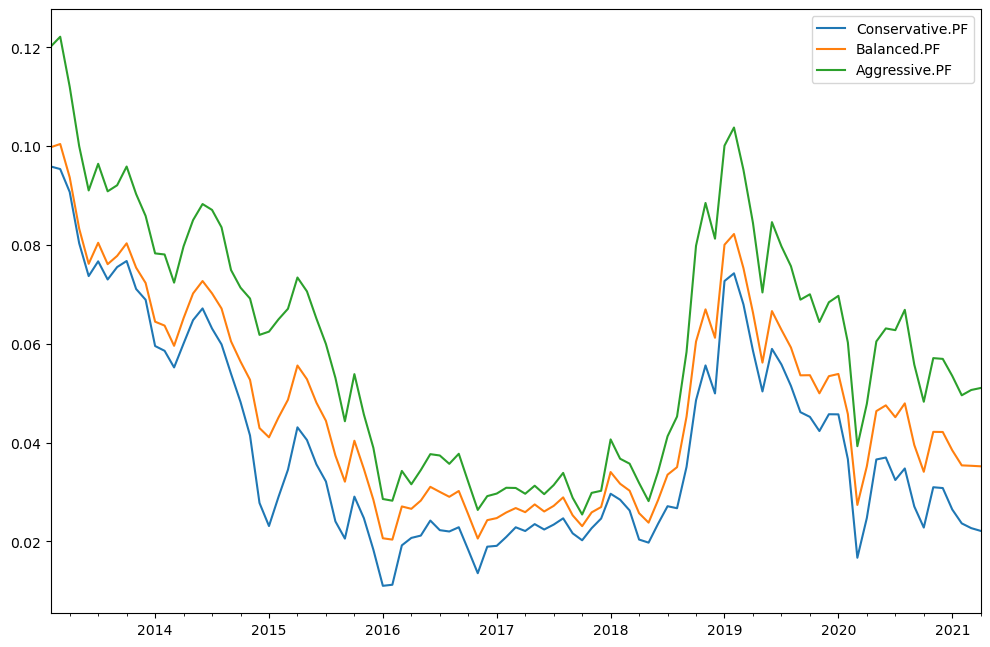

In [483]:
al_pf_lt_mix.get_rolling_cagr(window=12*10, real=True).plot()

In [484]:
al_pf_lt_mix.describe([5, 15, 18])

,property,period,Aggressive.PF,Balanced.PF,Conservative.PF,inflation
0,Compound return,YTD,0.052719,0.030846,0.022555,0.025333
1,CAGR,5 years,0.132899,0.106001,0.092931,0.022238
2,CAGR,15 years,0.076554,0.064534,0.056265,0.018970
3,CAGR,18 years,0.114386,0.092516,0.081226,0.020977
4,CAGR,"18 years, 2 months",0.117000,0.095067,0.084127,0.020995
5,Risk,"18 years, 2 months",0.174277,0.141654,0.144738,NaN
6,CVAR,"18 years, 2 months",0.436740,0.365494,0.358685,NaN
7,Max drawdowns,"18 years, 2 months",-0.493084,-0.417664,-0.406138,NaN
8,Max drawdowns dates,"18 years, 2 months",2009-02,2009-02,2009-02,NaN
9,Inception date,None,2003-03,2003-03,2003-03,2003-03
